In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# PRE_PROCESING


## Upload Data

In [2]:
pd.set_option('display.max_columns',40)

data = pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


## Describe all columns

In [3]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


## Look if there is missing value

In [4]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

## Transform value of dependent into 1 and 0 using maping method

In [5]:
data['result'] = data['result'].map({'yes':0, 'no':1})

data    

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,1


In [6]:
data.result.value_counts()

1    8903
0    3967
Name: result, dtype: int64

## Look cerrelation

In [7]:
corr = data.corr()['result']
high_corr = corr[abs(corr)>0.05].index.tolist()
high_corr

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/4230306431.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['result']


['balance', 'campaign', 'pdays', 'previous', 'result']

## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

In [8]:
vari = data[['balance', 'campaign', 'pdays', 'previous']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vari.values,i) for i in range(vari.shape[1])]
vif['Features'] = vari.columns
vif

,VIF,Features
0,1.098335,balance
1,1.111969,campaign
2,1.541053,pdays
3,1.523563,previous


## Drop 'pdays' and 'previous' columns because of value counts

In [9]:
data.pdays.value_counts()

-1      10067
 182       76
 92        75
 91        65
 181       63
        ...  
 440        1
 804        1
 434        1
 437        1
 427        1
Name: pdays, Length: 461, dtype: int64

In [10]:
data.previous.value_counts()

0     10067
1       921
2       692
3       391
4       248
5       182
6       109
7        60
8        54
9        28
10       28
12       20
11       18
13       11
14        6
17        6
16        4
15        4
20        4
19        2
21        2
23        2
29        2
30        2
18        2
26        1
37        1
22        1
58        1
55        1
Name: previous, dtype: int64

In [11]:
data = data.drop(['pdays','previous'], axis=1)
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,unknown,1


## Find out if there is Outlier

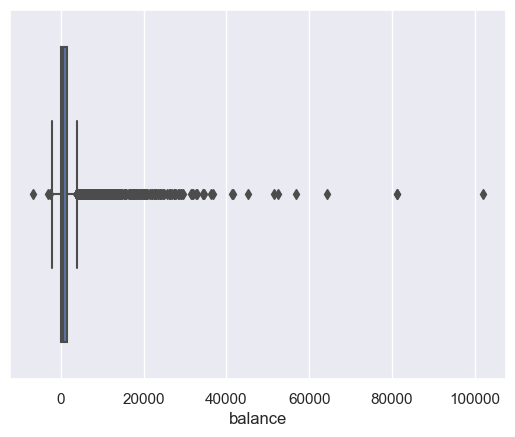

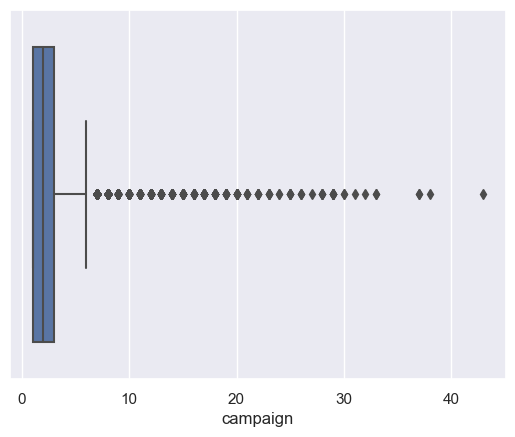

In [12]:
for i in data[['balance','campaign']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Outlier treatment

In [13]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/59704685.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/59704685.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [14]:
for i in data[['balance','campaign']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])

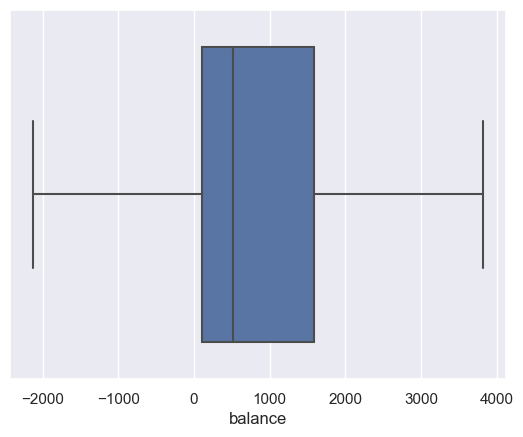

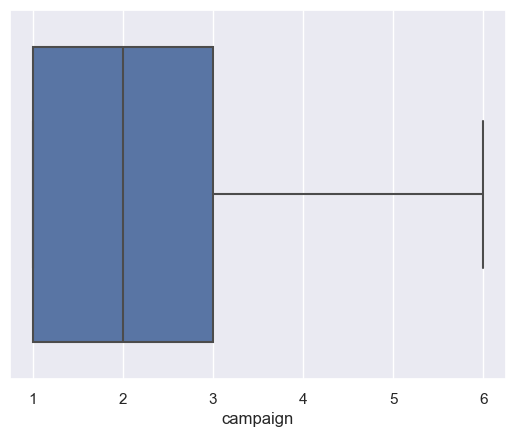

In [15]:
for i in data[['balance','campaign']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [16]:
data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
campaign     float64
response      object
result         int64
dtype: object

# WOE transformation:

## First we have to transform numeric columns to categorical and for that we are using quantile method.

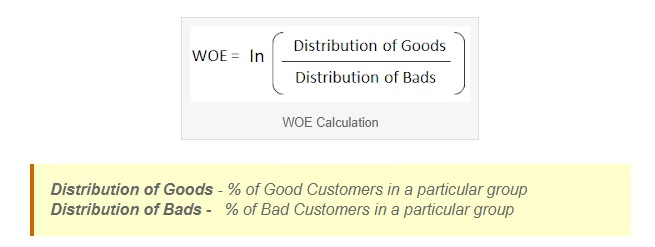

In [17]:
ranges = [ -np.inf, data['balance'].quantile(0.25), data['balance'].quantile(0.50), data['balance'].quantile(0.75), np.inf]
data['balance_category'] = pd.cut(data['balance'],bins=ranges)

grouped = data.groupby(['balance_category','result'])['result'].count().unstack().reset_index()
grouped['positive_prop']= grouped[0]/grouped[0].sum()
grouped['negative_prop']= grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'balance_woe'},inplace=True)
data = data.merge(grouped[['balance_category','balance_woe']],how='left', on='balance_category')

#data

In [18]:
ranges = [ -np.inf, data['campaign'].quantile(0.25), data['campaign'].quantile(0.50), data['campaign'].quantile(0.75), np.inf]
data['campaign_category'] = pd.cut(data['campaign'],bins=ranges)

grouped = data.groupby(['campaign_category','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'campaign_woe'},inplace=True)
data = data.merge(grouped[['campaign_category','campaign_woe']],how='left', on='campaign_category')

#data

In [19]:
grouped = data.groupby(['job','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'job_woe'},inplace=True)
data = data.merge(grouped[['job','job_woe']],how='left', on='job')

#data

In [20]:
grouped = data.groupby(['marital','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'marital_woe'},inplace=True)
data = data.merge(grouped[['marital','marital_woe']],how='left', on='marital')

#data

In [21]:
grouped = data.groupby(['education','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'education_woe'},inplace=True)
data = data.merge(grouped[['education','education_woe']],how='left', on='education')

#data

In [22]:
grouped = data.groupby(['default','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'default_woe'},inplace=True)
data = data.merge(grouped[['default','default_woe']],how='left', on='default')

#data

In [23]:
grouped = data.groupby(['housing','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'housing_woe'},inplace=True)
data = data.merge(grouped[['housing','housing_woe']],how='left', on='housing')

#data

In [24]:
grouped = data.groupby(['loan','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'loan_woe'},inplace=True)
data = data.merge(grouped[['loan','loan_woe']],how='left', on='loan')

#data

In [25]:
grouped = data.groupby(['contact','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'contact_woe'},inplace=True)
data = data.merge(grouped[['contact','contact_woe']],how='left', on='contact')

#data

In [26]:
grouped = data.groupby(['month','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'month_woe'},inplace=True)
data = data.merge(grouped[['month','month_woe']],how='left', on='month')

#data

In [27]:
grouped = data.groupby(['response','result'])['result'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'response_woe'},inplace=True)
data = data.merge(grouped[['response','response_woe']],how='left', on='response')

In [28]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result,balance_category,balance_woe,campaign_category,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe
0,13829,29,technician,single,tertiary,no,3826.375,no,no,cellular,11,may,2.0,unknown,1,"(1591.75, inf]",0.396176,"(1.0, 2.0]",-0.010317,-0.066429,0.275227,0.284837,0.009654,0.402913,0.081815,0.284130,-0.628775,-0.280460
1,22677,26,services,single,secondary,no,512.000,yes,yes,unknown,5,jun,3.0,unknown,1,"(102.0, 515.0]",-0.036100,"(2.0, 3.0]",-0.050576,-0.223585,0.275227,-0.112864,0.009654,-0.450332,-0.577916,-1.106492,-0.124481,-0.280460
2,10541,30,management,single,secondary,no,135.000,no,no,cellular,14,aug,2.0,unknown,1,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,0.275227,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460
3,13689,41,technician,married,unknown,no,30.000,yes,no,cellular,10,jul,1.0,unknown,1,"(-inf, 102.0]",-0.493008,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,0.112487,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460
4,11304,27,admin.,single,secondary,no,321.000,no,yes,unknown,2,sep,1.0,unknown,1,"(102.0, 515.0]",-0.036100,"(-inf, 1.0]",0.247182,0.018331,0.275227,-0.112864,0.009654,0.402913,-0.577916,-1.106492,1.839980,-0.280460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167.000,yes,no,cellular,30,apr,1.0,failure,0,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,0.658317,0.173374
12866,17259,31,unknown,married,secondary,no,111.000,no,no,cellular,21,nov,2.0,failure,0,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.019921,-0.168233,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.146627,0.173374
12867,15200,37,unemployed,single,tertiary,no,1316.000,yes,no,cellular,18,nov,1.0,failure,1,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,0.284649,0.275227,0.284837,0.009654,-0.450332,0.081815,0.284130,-0.146627,0.173374
12868,13775,42,management,married,tertiary,no,479.000,yes,no,unknown,28,may,2.0,unknown,1,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,-0.168233,0.284837,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460


## After WOE transformation we checking again if there is missing value

In [29]:
data.isnull().sum()

ID                   0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
campaign             0
response             0
result               0
balance_category     0
balance_woe          0
campaign_category    0
campaign_woe         0
job_woe              0
marital_woe          0
education_woe        0
default_woe          0
housing_woe          0
loan_woe             0
contact_woe          0
month_woe            0
response_woe         0
dtype: int64

In [30]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'response',
       'result', 'balance_category', 'balance_woe', 'campaign_category',
       'campaign_woe', 'job_woe', 'marital_woe', 'education_woe',
       'default_woe', 'housing_woe', 'loan_woe', 'contact_woe', 'month_woe',
       'response_woe'],
      dtype='object')

## Final data after pre processing

In [31]:
fin_data = data[['job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'response',
       'balance_category', 'balance_woe', 'campaign_category',
       'campaign_woe', 'job_woe', 'marital_woe', 'education_woe',
       'default_woe', 'housing_woe', 'loan_woe', 'contact_woe', 'month_woe',
       'response_woe','result']]
fin_data

,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,balance_category,balance_woe,campaign_category,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe,result
0,technician,single,tertiary,no,3826.375,no,no,cellular,11,may,2.0,unknown,"(1591.75, inf]",0.396176,"(1.0, 2.0]",-0.010317,-0.066429,0.275227,0.284837,0.009654,0.402913,0.081815,0.284130,-0.628775,-0.280460,1
1,services,single,secondary,no,512.000,yes,yes,unknown,5,jun,3.0,unknown,"(102.0, 515.0]",-0.036100,"(2.0, 3.0]",-0.050576,-0.223585,0.275227,-0.112864,0.009654,-0.450332,-0.577916,-1.106492,-0.124481,-0.280460,1
2,management,single,secondary,no,135.000,no,no,cellular,14,aug,2.0,unknown,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,0.275227,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460,1
3,technician,married,unknown,no,30.000,yes,no,cellular,10,jul,1.0,unknown,"(-inf, 102.0]",-0.493008,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,0.112487,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460,1
4,admin.,single,secondary,no,321.000,no,yes,unknown,2,sep,1.0,unknown,"(102.0, 515.0]",-0.036100,"(-inf, 1.0]",0.247182,0.018331,0.275227,-0.112864,0.009654,0.402913,-0.577916,-1.106492,1.839980,-0.280460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,technician,married,secondary,no,1167.000,yes,no,cellular,30,apr,1.0,failure,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,0.658317,0.173374,0
12866,unknown,married,secondary,no,111.000,no,no,cellular,21,nov,2.0,failure,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.019921,-0.168233,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.146627,0.173374,0
12867,unemployed,single,tertiary,no,1316.000,yes,no,cellular,18,nov,1.0,failure,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,0.284649,0.275227,0.284837,0.009654,-0.450332,0.081815,0.284130,-0.146627,0.173374,1
12868,management,married,tertiary,no,479.000,yes,no,unknown,28,may,2.0,unknown,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,-0.168233,0.284837,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460,1


# MODELLING


## Inputs and output

In [32]:
inputs = fin_data[['balance_woe','campaign_woe', 'job_woe', 'marital_woe', 'education_woe',
       'default_woe', 'housing_woe', 'loan_woe', 'contact_woe', 'month_woe',
       'response_woe']]
output = fin_data['result']

## Train test split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size=0.3,random_state=42)

# Default model


## Create function to measure Gini

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

## Fit our model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
base_model = RandomForestClassifier()
base_model.fit(X_train,y_train)

RandomForestClassifier()

## Look our model's performance

In [38]:
base_mod_accuracy = evaluate(base_model,X_test,y_test)

Model Performance
Gini pred is 33.430615919177086
Gini prob is 45.13523362473515


# Optimization model


## Create function to select best estimators

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


## Fit model

In [41]:
base_model_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

base_model_random.fit(X_train,y_train)

/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42)

## Look best estimators

In [42]:
base_model_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

## Optimized model performance

In [43]:
optimized_model = base_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini pred is 34.82707016960427
Gini prob is 51.92787709902946


## Create roc curve graph to compare base_model and optimized_model

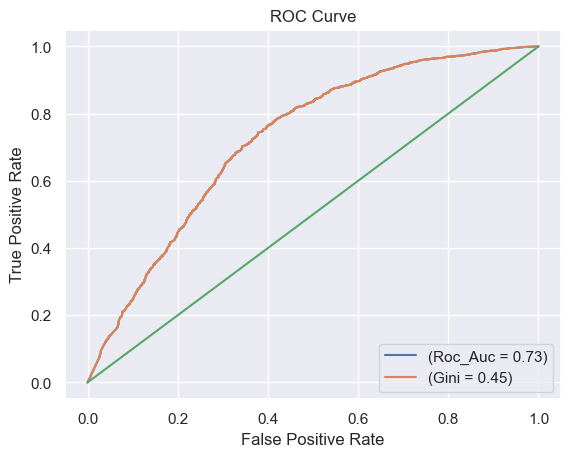

In [44]:
y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

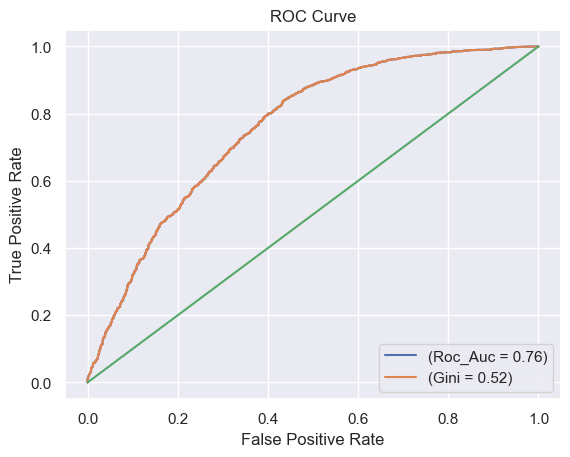

In [45]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# DEPLOYMENT


## Our optimized model showed higher Gini coefficient given 52%, hence we will deploy our trained model on new marketing data

In [46]:
test_data = pd.read_excel(r'marketing_test.xlsx')
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [47]:
X_train

,balance_woe,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe
10678,-0.493008,-0.534710,0.018331,0.275227,-0.112864,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460
5635,0.396176,-0.534710,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460
9343,0.396176,0.247182,0.018331,0.275227,-0.112864,0.009654,0.402913,0.081815,0.284130,1.839980,0.431817
4581,-0.493008,0.247182,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460
12117,0.056321,-0.534710,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,-0.577916,0.284130,-0.628775,-0.280460
...,...,...,...,...,...,...,...,...,...,...,...
11964,0.396176,0.247182,0.161072,-0.168233,-0.112864,0.009654,0.402913,0.081815,0.284130,0.658317,0.431817
5191,0.056321,-0.050576,0.161072,-0.168233,0.284837,0.009654,0.402913,0.081815,0.284130,1.958284,-0.280460
5390,-0.036100,-0.010317,-0.551866,-0.168233,-0.330354,0.009654,-0.450332,0.081815,-1.106492,-0.124481,-0.280460
860,-0.036100,-0.534710,-0.066429,-0.168233,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460


In [48]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')

In [49]:
test_data = test_data[['ID','balance','campaign','job','marital','education','default','housing','loan','contact','month','response']]
test_data

,ID,balance,campaign,job,marital,education,default,housing,loan,contact,month,response
0,812,764,1,blue-collar,single,secondary,no,yes,no,cellular,may,unknown
1,71,118,1,blue-collar,single,primary,no,no,no,unknown,feb,unknown
2,912,451,1,admin.,divorced,secondary,no,yes,no,cellular,jul,unknown
3,43,495,1,services,single,secondary,no,yes,no,cellular,nov,unknown
4,431,1548,2,blue-collar,married,primary,no,yes,yes,cellular,may,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,413,2,blue-collar,married,secondary,no,yes,no,cellular,aug,success
853,409,1282,4,management,married,tertiary,no,no,no,cellular,aug,unknown
854,105,976,3,admin.,married,primary,no,yes,no,unknown,jun,unknown
855,810,1159,1,unemployed,single,tertiary,no,no,no,telephone,jun,unknown


In [50]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result,balance_category,balance_woe,campaign_category,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe
0,13829,29,technician,single,tertiary,no,3826.375,no,no,cellular,11,may,2.0,unknown,1,"(1591.75, inf]",0.396176,"(1.0, 2.0]",-0.010317,-0.066429,0.275227,0.284837,0.009654,0.402913,0.081815,0.284130,-0.628775,-0.280460
1,22677,26,services,single,secondary,no,512.000,yes,yes,unknown,5,jun,3.0,unknown,1,"(102.0, 515.0]",-0.036100,"(2.0, 3.0]",-0.050576,-0.223585,0.275227,-0.112864,0.009654,-0.450332,-0.577916,-1.106492,-0.124481,-0.280460
2,10541,30,management,single,secondary,no,135.000,no,no,cellular,14,aug,2.0,unknown,1,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,0.275227,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460
3,13689,41,technician,married,unknown,no,30.000,yes,no,cellular,10,jul,1.0,unknown,1,"(-inf, 102.0]",-0.493008,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,0.112487,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460
4,11304,27,admin.,single,secondary,no,321.000,no,yes,unknown,2,sep,1.0,unknown,1,"(102.0, 515.0]",-0.036100,"(-inf, 1.0]",0.247182,0.018331,0.275227,-0.112864,0.009654,0.402913,-0.577916,-1.106492,1.839980,-0.280460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167.000,yes,no,cellular,30,apr,1.0,failure,0,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,-0.066429,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,0.658317,0.173374
12866,17259,31,unknown,married,secondary,no,111.000,no,no,cellular,21,nov,2.0,failure,0,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.019921,-0.168233,-0.112864,0.009654,0.402913,0.081815,0.284130,-0.146627,0.173374
12867,15200,37,unemployed,single,tertiary,no,1316.000,yes,no,cellular,18,nov,1.0,failure,1,"(515.0, 1591.75]",0.056321,"(-inf, 1.0]",0.247182,0.284649,0.275227,0.284837,0.009654,-0.450332,0.081815,0.284130,-0.146627,0.173374
12868,13775,42,management,married,tertiary,no,479.000,yes,no,unknown,28,may,2.0,unknown,1,"(102.0, 515.0]",-0.036100,"(1.0, 2.0]",-0.010317,0.161072,-0.168233,0.284837,0.009654,-0.450332,0.081815,-1.106492,-0.628775,-0.280460


In [51]:
data.balance_category.value_counts()

(-inf, 102.0]       3230
(1591.75, inf]      3218
(515.0, 1591.75]    3215
(102.0, 515.0]      3207
Name: balance_category, dtype: int64

In [52]:
ranges = [-np.inf, 102.0, 515.0, 1591.75, np.inf]
test_data['balance_category'] = pd.cut(test_data['balance'], bins=ranges)

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/583336966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['balance_category'] = pd.cut(test_data['balance'], bins=ranges)


In [53]:
data.campaign_category.value_counts()

(-inf, 1.0]    5222
(1.0, 2.0]     3493
(3.0, inf]     2599
(2.0, 3.0]     1556
Name: campaign_category, dtype: int64

In [54]:
ranges = [-np.inf, 1.0, 2.0, 3.0, np.inf]
test_data['campaign_category'] = pd.cut(test_data['campaign'], bins=ranges)

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/4163733591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['campaign_category'] = pd.cut(test_data['campaign'], bins=ranges)


In [55]:
test_data = test_data.merge(data[['balance_category','balance_woe']].drop_duplicates(subset='balance_category'), how='left', on='balance_category')
test_data = test_data.merge(data[['campaign_category','campaign_woe']].drop_duplicates(subset='campaign_category'),how='left', on='campaign_category')

In [56]:
#test_data

In [57]:
test_data = test_data.merge(data[['job','job_woe']].drop_duplicates(subset='job'), how='left', on='job')
test_data = test_data.merge(data[['marital','marital_woe']].drop_duplicates(subset='marital'), how='left', on='marital')
test_data = test_data.merge(data[['education','education_woe']].drop_duplicates(subset='education'), how='left', on='education')
test_data = test_data.merge(data[['default','default_woe']].drop_duplicates(subset='default'), how='left', on='default')
test_data = test_data.merge(data[['housing','housing_woe']].drop_duplicates(subset='housing'), how='left', on='housing')
test_data = test_data.merge(data[['loan','loan_woe']].drop_duplicates(subset='loan'), how='left', on='loan')
test_data = test_data.merge(data[['contact','contact_woe']].drop_duplicates(subset='contact'), how='left', on='contact')
test_data = test_data.merge(data[['month','month_woe']].drop_duplicates(subset='month'), how='left', on='month')
test_data = test_data.merge(data[['response','response_woe']].drop_duplicates(subset='response'), how='left', on='response')

test_data

,ID,balance,campaign,job,marital,education,default,housing,loan,contact,month,response,balance_category,campaign_category,balance_woe,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe
0,812,764,1,blue-collar,single,secondary,no,yes,no,cellular,may,unknown,"(515.0, 1591.75]","(-inf, 1.0]",0.056321,0.247182,-0.551866,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.628775,-0.280460
1,71,118,1,blue-collar,single,primary,no,no,no,unknown,feb,unknown,"(102.0, 515.0]","(-inf, 1.0]",-0.036100,0.247182,-0.551866,0.275227,-0.330354,0.009654,0.402913,0.081815,-1.106492,0.430915,-0.280460
2,912,451,1,admin.,divorced,secondary,no,yes,no,cellular,jul,unknown,"(102.0, 515.0]","(-inf, 1.0]",-0.036100,0.247182,0.018331,0.060831,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460
3,43,495,1,services,single,secondary,no,yes,no,cellular,nov,unknown,"(102.0, 515.0]","(-inf, 1.0]",-0.036100,0.247182,-0.223585,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.146627,-0.280460
4,431,1548,2,blue-collar,married,primary,no,yes,yes,cellular,may,unknown,"(515.0, 1591.75]","(1.0, 2.0]",0.056321,-0.010317,-0.551866,-0.168233,-0.330354,0.009654,-0.450332,-0.577916,0.284130,-0.628775,-0.280460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,413,2,blue-collar,married,secondary,no,yes,no,cellular,aug,success,"(102.0, 515.0]","(1.0, 2.0]",-0.036100,-0.010317,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.111781,2.549958
853,409,1282,4,management,married,tertiary,no,no,no,cellular,aug,unknown,"(515.0, 1591.75]","(3.0, inf]",0.056321,-0.534710,0.161072,-0.168233,0.284837,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460
854,105,976,3,admin.,married,primary,no,yes,no,unknown,jun,unknown,"(515.0, 1591.75]","(2.0, 3.0]",0.056321,-0.050576,0.018331,-0.168233,-0.330354,0.009654,-0.450332,0.081815,-1.106492,-0.124481,-0.280460
855,810,1159,1,unemployed,single,tertiary,no,no,no,telephone,jun,unknown,"(515.0, 1591.75]","(-inf, 1.0]",0.056321,0.247182,0.284649,0.275227,0.284837,0.009654,0.402913,0.081815,0.132325,-0.124481,-0.280460


In [58]:
data.isnull().sum()

ID                   0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
campaign             0
response             0
result               0
balance_category     0
balance_woe          0
campaign_category    0
campaign_woe         0
job_woe              0
marital_woe          0
education_woe        0
default_woe          0
housing_woe          0
loan_woe             0
contact_woe          0
month_woe            0
response_woe         0
dtype: int64

In [59]:
test_data.columns

Index(['ID', 'balance', 'campaign', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'response', 'balance_category',
       'campaign_category', 'balance_woe', 'campaign_woe', 'job_woe',
       'marital_woe', 'education_woe', 'default_woe', 'housing_woe',
       'loan_woe', 'contact_woe', 'month_woe', 'response_woe'],
      dtype='object')

In [60]:
test_data_woe = test_data[['ID','balance_woe', 'campaign_woe', 'job_woe',
       'marital_woe', 'education_woe', 'default_woe', 'housing_woe',
       'loan_woe', 'contact_woe', 'month_woe', 'response_woe']]
test_data_woe

,ID,balance_woe,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe
0,812,0.056321,0.247182,-0.551866,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.628775,-0.280460
1,71,-0.036100,0.247182,-0.551866,0.275227,-0.330354,0.009654,0.402913,0.081815,-1.106492,0.430915,-0.280460
2,912,-0.036100,0.247182,0.018331,0.060831,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460
3,43,-0.036100,0.247182,-0.223585,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.146627,-0.280460
4,431,0.056321,-0.010317,-0.551866,-0.168233,-0.330354,0.009654,-0.450332,-0.577916,0.284130,-0.628775,-0.280460
...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,-0.036100,-0.010317,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.111781,2.549958
853,409,0.056321,-0.534710,0.161072,-0.168233,0.284837,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460
854,105,0.056321,-0.050576,0.018331,-0.168233,-0.330354,0.009654,-0.450332,0.081815,-1.106492,-0.124481,-0.280460
855,810,0.056321,0.247182,0.284649,0.275227,0.284837,0.009654,0.402913,0.081815,0.132325,-0.124481,-0.280460


In [61]:
prob = optimized_model.predict_proba(test_data_woe.iloc[:,1:])[:,1]

In [62]:
test_data_woe['PD'] = prob
test_data_woe

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_12186/2561058433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_woe['PD'] = prob


,ID,balance_woe,campaign_woe,job_woe,marital_woe,education_woe,default_woe,housing_woe,loan_woe,contact_woe,month_woe,response_woe,PD
0,812,0.056321,0.247182,-0.551866,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.628775,-0.280460,0.631635
1,71,-0.036100,0.247182,-0.551866,0.275227,-0.330354,0.009654,0.402913,0.081815,-1.106492,0.430915,-0.280460,0.834077
2,912,-0.036100,0.247182,0.018331,0.060831,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.248969,-0.280460,0.535997
3,43,-0.036100,0.247182,-0.223585,0.275227,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.146627,-0.280460,0.587379
4,431,0.056321,-0.010317,-0.551866,-0.168233,-0.330354,0.009654,-0.450332,-0.577916,0.284130,-0.628775,-0.280460,0.817116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,-0.036100,-0.010317,-0.551866,-0.168233,-0.112864,0.009654,-0.450332,0.081815,0.284130,-0.111781,2.549958,0.203994
853,409,0.056321,-0.534710,0.161072,-0.168233,0.284837,0.009654,0.402913,0.081815,0.284130,-0.111781,-0.280460,0.757363
854,105,0.056321,-0.050576,0.018331,-0.168233,-0.330354,0.009654,-0.450332,0.081815,-1.106492,-0.124481,-0.280460,0.914318
855,810,0.056321,0.247182,0.284649,0.275227,0.284837,0.009654,0.402913,0.081815,0.132325,-0.124481,-0.280460,0.467607
